In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Collecting yfinance
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
     - -------------------------------------- 0.1/3.0 MB 229.0 kB/s eta 0:00:13
     - -------------------------------------- 0.1/3.0 MB 229.0 kB/s eta 0:00:13
     - -------------------------------------- 0.1/3.0 MB 229.0 kB/s eta 0:00:13
     - -------------------------------------- 0.1/3.0

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download data
tickers = ['^GSPC', '^IXIC', '^DJI']  # S&P 500, NASDAQ, DJIA
data = yf.download(tickers, start="2015-01-01", end="2024-09-27")

# Calculate daily returns
returns = data['Adj Close'].pct_change()

# Calculate rolling 30-day volatility
volatility = returns.rolling(window=30).std() * np.sqrt(252)  # Annualized

[*********************100%***********************]  3 of 3 completed


In [5]:
volatility

Ticker,^DJI,^GSPC,^IXIC
Date,,,
2015-01-02 00:00:00+00:00,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,NaN,NaN,NaN
2015-01-06 00:00:00+00:00,NaN,NaN,NaN
2015-01-07 00:00:00+00:00,NaN,NaN,NaN
2015-01-08 00:00:00+00:00,NaN,NaN,NaN
...,...,...,...
2024-09-20 00:00:00+00:00,0.105590,0.141613,0.213900
2024-09-23 00:00:00+00:00,0.105579,0.141452,0.213785
2024-09-24 00:00:00+00:00,0.104179,0.141291,0.213973


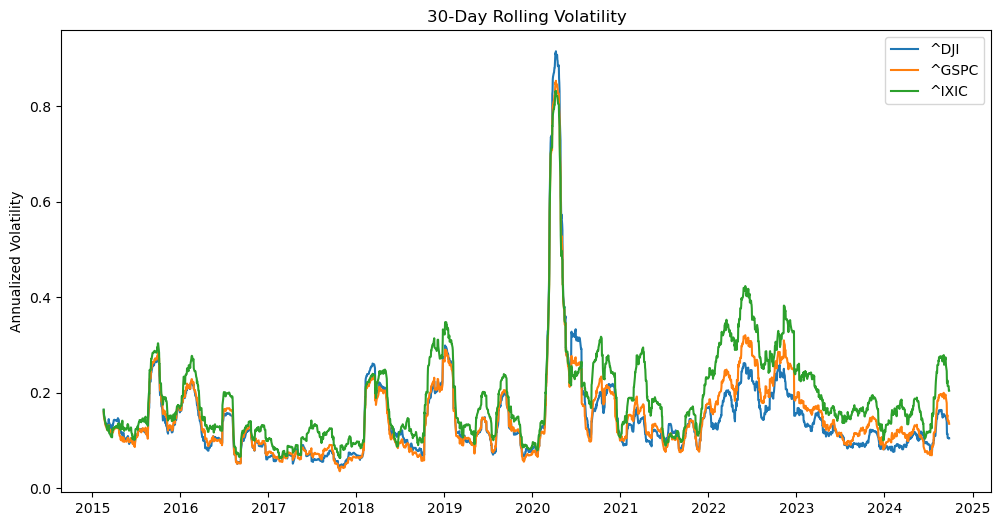

In [6]:
plt.figure(figsize=(12, 6))
for col in volatility.columns:
    plt.plot(volatility.index, volatility[col], label=col)
plt.title('30-Day Rolling Volatility')
plt.legend()
plt.ylabel('Annualized Volatility')
plt.show()

<Figure size 1200x600 with 0 Axes>

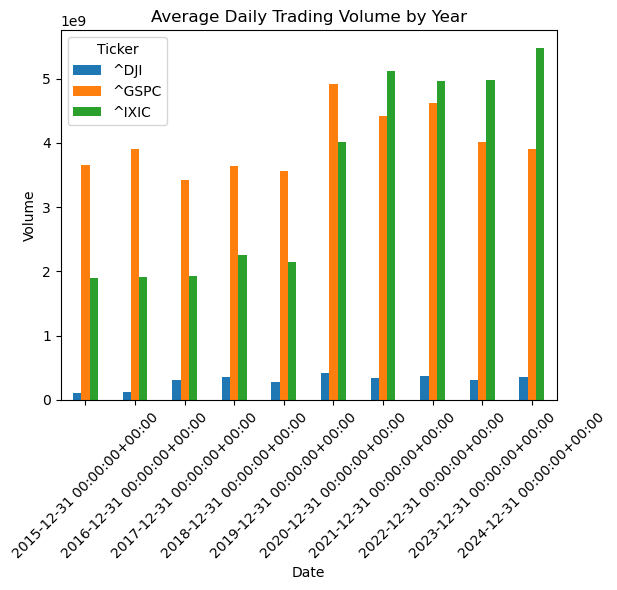

In [7]:
# Calculate average daily volume by year
annual_volume = data['Volume'].resample('Y').mean()

plt.figure(figsize=(12, 6))
annual_volume.plot(kind='bar')
plt.title('Average Daily Trading Volume by Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

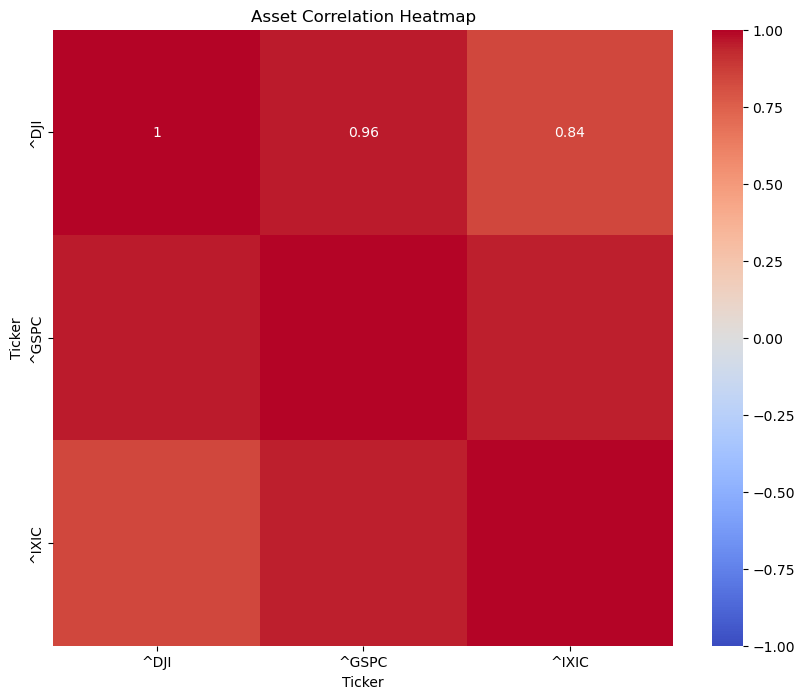

In [8]:
# Calculate correlation of returns
correlation = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Asset Correlation Heatmap')
plt.show()

In [9]:
correlation

Ticker,^DJI,^GSPC,^IXIC
Ticker,,,
^DJI,1.000000,0.955949,0.840279
^GSPC,0.955949,1.000000,0.947055
^IXIC,0.840279,0.947055,1.000000
